In [18]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Read Input Data

In [19]:
df = pd.read_excel('quadrato.xlsx')

In [20]:
df.sort_values('Time',inplace=True)
#df.drop('Eu Obj', axis =1, inplace=True)
#df.drop('Mod Obj', axis =1, inplace=True)

In [21]:
df.head()

,Square_index,Time,big,n_items
201,1.826667,0.010,1.712800,3
558,1.046667,0.011,1.218433,3
21,2.253333,0.014,2.220000,3
424,1.166667,0.015,2.451100,3
5,1.246667,0.019,2.298367,3


In [22]:
df2 = df[df['Time'] < 300]
#df2 = df.drop(columns=['Obj heur', 'Obj mod', 'Min Time', 'Max Time', 'Min Area', 'Max Area', 'Min D', 'Max D', 'Min W', 'Max W'])

In [23]:
df2.head()

,Square_index,Time,big,n_items
201,1.826667,0.010,1.712800,3
558,1.046667,0.011,1.218433,3
21,2.253333,0.014,2.220000,3
424,1.166667,0.015,2.451100,3
5,1.246667,0.019,2.298367,3


## Correlation

In [24]:
df2.corr()

,Square_index,Time,big,n_items
Square_index,1.000000,-0.167567,0.355180,-0.194444
Time,-0.167567,1.000000,-0.133308,0.453270
big,0.355180,-0.133308,1.000000,-0.131173
n_items,-0.194444,0.453270,-0.131173,1.000000


Plot of correlation

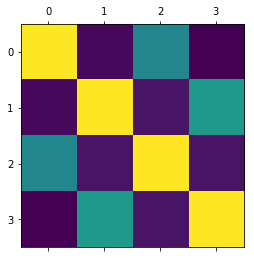

In [25]:
plt.matshow(df2.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe33436ba50>,
      dtype=object)

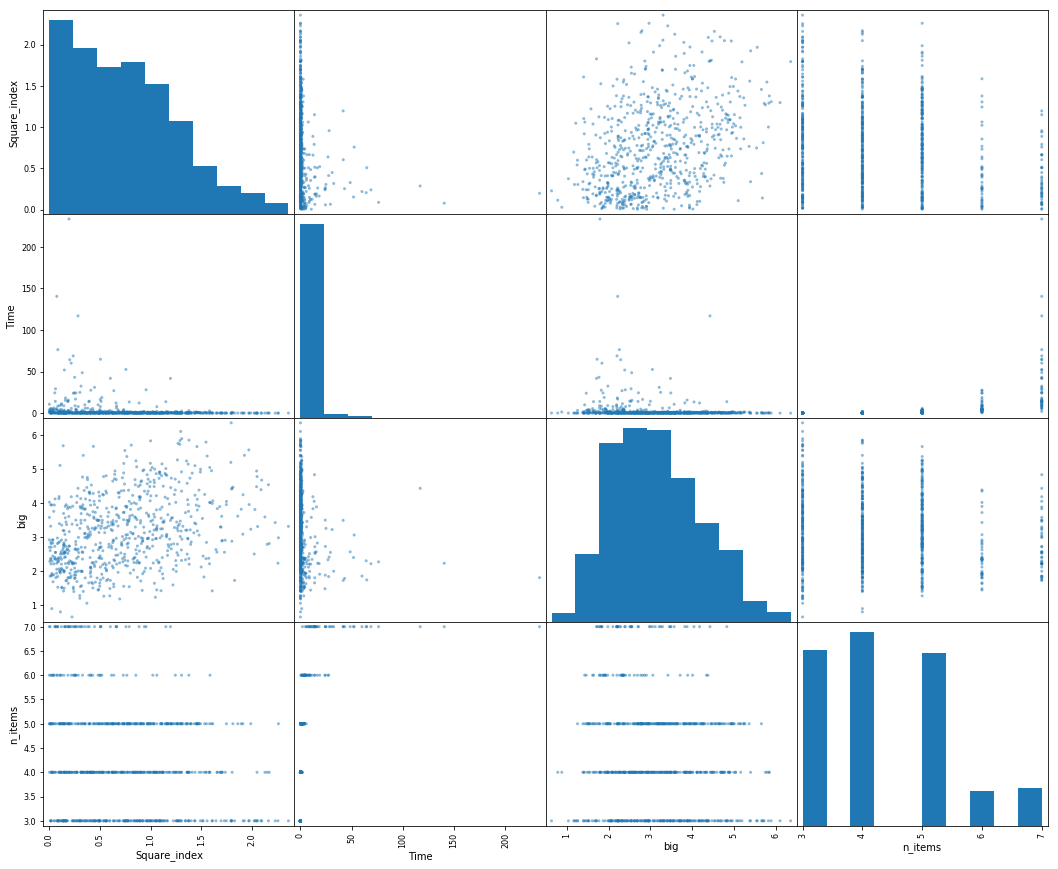

In [26]:
pd.plotting.scatter_matrix(df2, figsize=(18,15))

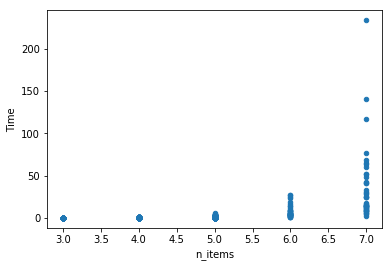

In [27]:
df2.plot.scatter('n_items', 'Time')

## Analyze data information

In [11]:
df2.reset_index(inplace=True,drop=True)

In [12]:
df3 = df2.drop(columns=['Time'])

## Rescale data

In [13]:
scaler = StandardScaler()

In [14]:
df3 = pd.DataFrame(data = scaler.fit_transform(df3))

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python2.7/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Rescaled data

In [15]:
df3.head()

,0,1,2
0,1.952900,-1.565662,-1.149849
1,0.432795,-2.045824,-1.149849
2,2.784411,-1.073035,-1.149849
3,0.666657,-0.848575,-1.149849
4,0.822565,-0.996920,-1.149849


## PCA

In [16]:
pca = PCA()

In [17]:
principalDf = pd.DataFrame(data = pca.fit_transform(df3), columns = ['pc1','pc2','pc3','pc4'])

ValueError: Shape of passed values is (3, 600), indices imply (4, 600)

In [ ]:
cumul_expl_var_ratio = pca.explained_variance_ratio_.cumsum()

In [ ]:
cumul_expl_var_ratio

In [ ]:
pca.explained_variance_ratio_

Data in the new system

In [ ]:
principalDf.head()

New orthogonal system vectors

In [ ]:
pca.components_

In [ ]:
df_compressed = principalDf.drop(columns=['pc4'])
df_compressed = pd.concat([df_compressed, df2['Time']],axis=1)

In [ ]:
df_compressed.head()

In [ ]:
df_compressed.corr()

In [ ]:
pd.plotting.scatter_matrix(df_compressed, figsize=(18,15))

## Linear Regression

In [ ]:
regressor = LinearRegression()

In [ ]:
X = df_compressed.copy()
y = X.pop('Time')

In [ ]:
regressor.fit(X,y)